In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv("iris.csv")
data.head()  #setosa,Versicolor,virginica

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#Basic checks
data.shape

(150, 5)

In [7]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [9]:
# Define X and Y
X = data.iloc[:,:-1]
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [12]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [14]:
accuracy_score(data.target,model.labels_) 

0.8933333333333333

In [15]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [17]:
confusion_matrix(data.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

# Visualization

In [18]:
y = pd.DataFrame(data.target)
y.head(2)

,target
0,0
1,0


Text(0.5, 1.0, 'this is actual datase')

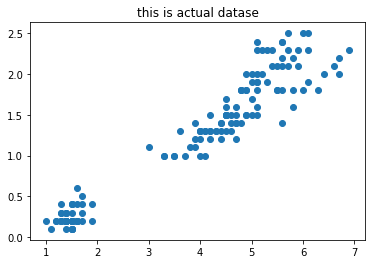

In [20]:
plt.scatter(x=data.petal_length,y=data.petal_width)
plt.title("this is actual datase")

In [21]:
color = np.array(['red','blue','green'])

Text(0.5, 1.0, 'this is actual datase')

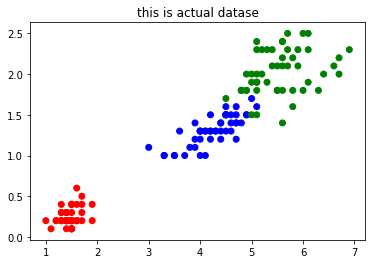

In [22]:
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[data.target])
plt.title("this is actual datase")

Text(0.5, 1.0, 'this is predicted')

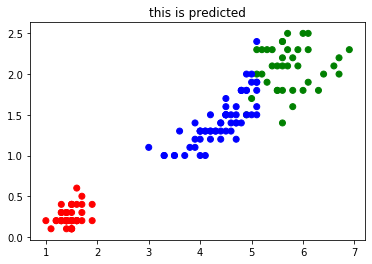

In [24]:
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[model.labels_])
plt.title("this is predicted")

# Elbow Technique
-To find the no. of clusters hidden in the data ot to find KMeans
-K=1 to 17,We calculate disrtion and then we plot graph K and disrtion
-Disortion -Avg distance of the points to the centroid
d Decreases as the number of cluster increases

In [25]:
from scipy.spatial.distance import cdist

In [26]:
X = data.iloc[:,[2,3]]
#X.head()

In [32]:
disortions = []
K = range(1,17)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    disortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

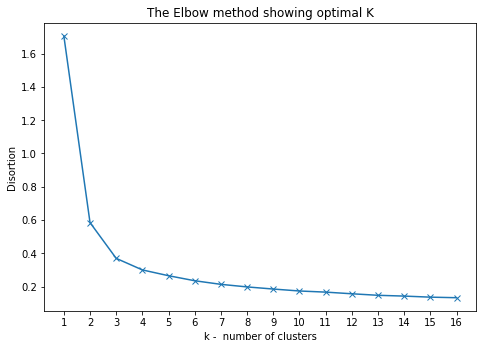

In [34]:
# plot the elbow
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('k -  number of clusters')
ax.set_ylabel('Disortion')
ax.set_title('The Elbow method showing optimal K')
ax.plot(K,disortions,marker='x')
plt.show()